

---


# PART 1



---





In [ ]:
#MACHINE LEARNING (CS60050)
#ASSIGNMETN 2
#GROUP 083
#RAVI PRATAP SINGH 20CS60R60
#SAHIL JAIN 20CS60R64
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import requests
from io import StringIO
orig_url='https://drive.google.com/file/d/1eUR2pG3DaGDFMqIjHSTezQyzcKgvda5F/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)


In [ ]:
#splitting data set in 80/20 splits

# Shuffle your dataset 
shuffle_df = data.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8* len(data))

# Split your dataset 
train = shuffle_df[:train_size]
test= shuffle_df[train_size:]

In [ ]:
train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

In [ ]:
""" 
#data visualization
#Age Distribution of Customers
sns.distplot(train.Age)

#Age Vs Annual premium
sns.scatterplot(x=train['Age'],y=train['Annual_Premium'])

#Gender and Response
sns.countplot(train.Gender)

#Response and Vehicle age
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df
"""

" \n#data visualization\n#Age Distribution of Customers\nsns.distplot(train.Age)\n\n#Age Vs Annual premium\nsns.scatterplot(x=train['Age'],y=train['Annual_Premium'])\n\n#Gender and Response\nsns.countplot(train.Gender)\n\n#Response and Vehicle age\ndf=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()\ndf\n"

## Task a

In [ ]:
train.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

##### No missing values in training data

In [ ]:
test.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

###### No missing values in testing data

In [ ]:
train['Response'].value_counts()

0    267476
1     37411
Name: Response, dtype: int64

## Task b

In [ ]:
#encoding categorical values in training data set
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['Gender'] = le.fit_transform(train['Gender'])
train['Previously_Insured'] = le.fit_transform(train['Previously_Insured'])
train['Vehicle_Age'] = le.fit_transform(train['Vehicle_Age'])
train['Vehicle_Damage'] = le.fit_transform(train['Vehicle_Damage'])
train['Response'] = le.fit_transform(train['Response'])
train['Annual_Premium'] = train['Annual_Premium'].astype(int) 
train['Policy_Sales_Channel'] = train['Policy_Sales_Channel'].astype(int) 
train['Region_Code'] = train['Region_Code'].astype(int) 

train = pd.concat([train[['Age','Region_Code','Annual_Premium', 'Policy_Sales_Channel', 'Vintage']],
           pd.get_dummies(train[['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']])], axis=1)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
test['Gender'] =le.fit_transform(test['Gender'])
test['Previously_Insured'] = le.fit_transform(test['Previously_Insured'])
test['Vehicle_Age'] = le.fit_transform(test['Vehicle_Age'])
test['Vehicle_Damage'] = le.fit_transform(test['Vehicle_Damage'])
test['Response'] = le.fit_transform(test['Response'])
test['Annual_Premium'] = test['Annual_Premium'].astype(int) 
test['Policy_Sales_Channel'] = test['Policy_Sales_Channel'].astype(int) 
test['Region_Code'] = test['Region_Code'].astype(int)

test = pd.concat([test[['Age', 'Region_Code','Annual_Premium', 'Policy_Sales_Channel', 'Vintage']],
           pd.get_dummies(test[['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']])], axis=1)

## Task c

In [ ]:

#Transformas the centers of the data
#by removing the mean value of each feature and then scale it 
#by dividing (non-constant) features by their standard deviation
class FeatureScaling:
    def __init__(self,X,y):
        self.X=X.copy()
        if y.ndim==1:
            y=np.reshape(y,(y.shape[0],1))
        self.y=y.copy()
        self.minMax_X={}
        self.minMax_y={}
    
    def fit_transform_X(self):
        num_of_features=self.X.shape[1]
        for i in range(num_of_features):
            feature=self.X[:,i]
            Mean=np.mean(feature)
            Min=np.min(feature)
            Max=np.max(feature)
            feature=(feature-Mean)/(Max-Min)
            self.minMax_X[i]=np.array([Mean,Min,Max])
            self.X[:,i]=feature
        return self.X.copy()
    
    def fit_transform_Y(self):
        num_of_features=self.y.shape[1]
        for i in range(num_of_features):
            feature=self.y[:,i]
            Mean=np.mean(feature)
            Min=np.min(feature)
            Max=np.max(feature)
            feature=(feature-Mean)/(Max-Min)
            self.minMax_y[i]=np.array([Mean,Min,Max])
            self.y[:,i]=feature
        return np.reshape(self.y,self.y.shape[0])
    
    def inverse_transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_X[i][1]
            Max=self.minMax_X[i][2]
            feature=feature*(Max-Min)+Mean
            X_transformed[:,i]=feature
        return X_transformed
    
    def inverse_transform_Y(self,y):
        y_transformed=y.copy()
        if y_transformed.ndim==1:
            y_transformed=np.reshape(y_transformed,(y_transformed.shape[0],1))
        num_of_features=y_transformed.shape[1]
        for i in range(num_of_features):
            feature=y_transformed[:,i]
            Mean=self.minMax_y[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=feature*(Max-Min)+Mean
            y_transformed[:,i]=feature
        return np.reshape(y_transformed,y_transformed.shape[0])
    
    def transform_X(self,X):
        X_transformed=X.copy()
        num_of_features=X_transformed.shape[1]
        for i in range(num_of_features):
            feature=X_transformed[:,i]
            Mean=self.minMax_X[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=(feature-Mean)/(Max-Min)
            X_transformed[:,i]=feature
        return X_transformed
    
    def transform_Y(self,y):
        y_transformed=y.copy()
        if y_transformed.ndim==1:
            y_transformed=np.reshape(y_transformed,(y_transformed.shape[0],1))
        num_of_features=y_transformed.shape[1]
        for i in range(num_of_features):
            feature=y_transformed[:,i]
            Mean=self.minMax_y[i][0]
            Min=self.minMax_y[i][1]
            Max=self.minMax_y[i][2]
            feature=(feature-Mean)/(Max-Min)
            y_transformed[:,i]=feature
        return np.reshape(y_transformed,y_transformed.shape[0])
    
    def returnX(self):
        return self.X
    
    def returnY(self):
        return self.y

In [ ]:
#a class for naive bayes classifier functionalities
class Naive_Bayes():
    def __init__(self):
        self.class_data_dic={}

    #used to fit the data into our naive bayes model  
    def fit(self,X_train,y_train):
        def generate_data(class_data_dic,X_train,y_train):
            first_one=True
            first_zero=True
            for i in range(y_train.shape[0]):
                X_temp=X_train[i,:].reshape(X_train[i,:].shape[0],1)
                if y_train[i]==1:
                    if first_one==True:
                        class_data_dic[1]=X_temp
                        first_one=False
                    else:
                        class_data_dic[1]=np.append(class_data_dic[1],X_temp,axis=1)
                elif y_train[i]==0:
                    if first_zero==True:
                        class_data_dic[0]=X_temp
                        first_zero=False
                    else:
                        class_data_dic[0]=np.append(class_data_dic[0],X_temp,axis=1)
            return class_data_dic
    
        self.X_train=X_train
        self.y_train=y_train
        self.class_data_dic[0]=np.array([[]])
        self.class_data_dic[1]=np.array([[]])
        self.class_data_dic=generate_data(self.class_data_dic,self.X_train,self.y_train)
        self.class_data_dic[0]=self.class_data_dic[0].T
        self.class_data_dic[1]=self.class_data_dic[1].T
        self.mean_0=np.mean(self.class_data_dic[0],axis=0)
        self.mean_1=np.mean(self.class_data_dic[1],axis=0)
        self.std_0=np.std(self.class_data_dic[0],axis=0)
        self.std_1=np.std(self.class_data_dic[1],axis=0)
        
    #function to predict the values    
    def predict(self,X_test):
        def posterior(X,X_train_class,mean_,std_):
            def likelyhood(x,mean,sigma):
                return np.exp(-(x-mean)**2/(2*sigma**2))*(1/(np.sqrt(2*np.pi)*sigma))
            
            product=np.prod(likelyhood(X,mean_,std_),axis=1)
            product=product*(X_train_class.shape[0]/self.X_train.shape[0])
            return product
        
        p_1=posterior(X_test,self.class_data_dic[1],self.mean_1,self.std_1)
        p_0=posterior(X_test,self.class_data_dic[0],self.mean_0,self.std_0)
        return 1*(p_1>p_0)

In [ ]:
#getting train and test size
train_size=int(0.80*data.shape[0])
test_size=int(0.20*data.shape[0])

In [ ]:
#feature scaling and normalizinf the training data
data=data.sample(frac=1)
X=data.iloc[:,[4, 8]].values
y=data.iloc[:,11].values
X=X.astype(float)
#feature scaling
fs=FeatureScaling(X,y)
X=fs.fit_transform_X()

In [ ]:
#training set split in x-y dimension
X_train=X[0:train_size,:]
y_train=y[0:train_size]  #testing set split 
X_test=X[train_size:,:] 
y_test=y[train_size:]

In [ ]:
#creating object for classifier
nb=Naive_Bayes()
#fit the classifier
nb.fit(X_train,y_train)

In [ ]:
#getting the confusion matrix
y_pred=nb.predict(X_test)
tp=len([i for i in range(0,y_test.shape[0]) if y_test[i]==0 and y_pred[i]==0])
tn=len([i for i in range(0,y_test.shape[0]) if y_test[i]==0 and y_pred[i]==1])
fp=len([i for i in range(0,y_test.shape[0]) if y_test[i]==1 and y_pred[i]==0])
fn=len([i for i in range(0,y_test.shape[0]) if y_test[i]==1 and y_pred[i]==1])
confusion_matrix=np.array([[tp,tn],[fp,fn]])
print(confusion_matrix)

#printing accuracy
accuracy = ((tn+tp)/(tn+fp+fn+tp) ) *100
print(accuracy)

[[66751    83]
 [ 9372    16]]
87.68334601558605




---

# PART 2


---



In [ ]:
#using inbuild function for PCA
from sklearn.decomposition import PCA,SparsePCA,KernelPCA,NMF

In [ ]:
import requests
from io import StringIO
from sklearn.preprocessing import MinMaxScaler
orig_url='https://drive.google.com/file/d/1eUR2pG3DaGDFMqIjHSTezQyzcKgvda5F/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df = pd.read_csv(csv_raw)

In [ ]:
C = (df.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (df.dtypes == 'int64') 
Float   = (df.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

Missing_Percentage = (df.isnull().sum()).sum()/np.product(df.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 0.0 %


In [ ]:
df.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [ ]:
Vehicle_Age_map  = {'< 1 Year':0,'1-2 Year':1,'> 2 Years':2}

df['Vehicle_Age'] = df['Vehicle_Age'].map(Vehicle_Age_map)
df=df.set_index("id")

C = (df.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (df.dtypes == 'int64') 
Float   = (df.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

df.head()

Gender  Age  Driving_License  ...  Policy_Sales_Channel  Vintage  Response
id                                ...                                         
1     Male   44                1  ...                  26.0      217         1
2     Male   76                1  ...                  26.0      183         0
3     Male   47                1  ...                  26.0       27         1
4     Male   21                1  ...                 152.0      203         0
5   Female   29                1  ...                 152.0       39         0

[5 rows x 11 columns]

In [ ]:
def highlight_cols(s, coldict):
    if s.name in coldict.keys():
        return ['background-color: {}'.format(coldict[s.name])] * len(s)
    return [''] * len(s)

def ExtractColumn(lst,j): 
    return [item[j] for item in lst] 

In [ ]:
coldict = {'Gender':'lightcoral','Age':'lightcoral', 'Driving_License':'lightsalmon', 'Region_Code':'lightsalmon', 'Previously_Insured':'lightsalmon'
           , 'Vehicle_Age':'lightsalmon', 'Vehicle_Damage':'lightsalmon', 'Annual_Premium':'lightsalmon', 'Policy_Sales_Channel':'tomato'
           ,'Vintage':'tomato','Response':'darksalmon'}
df.iloc[0:5].style.apply(highlight_cols, coldict=coldict)

In [ ]:
df_dummy = pd.get_dummies(df[CategoricalVariables], columns=CategoricalVariables)
df_numeric = df[NumericVariables]
df_final = pd.merge(df_numeric,df_dummy,on='id')

response = ['Response']
VariablesNoTarget = [x for x in df_final.columns if x not in response]
print("Dummy transformation was successful")

Dummy transformation was successful


In [ ]:
from mlxtend.preprocessing import minmax_scaling
coldict_dummy = {'Gender_Female':'lightcoral','Gender_Male':'lightcoral','Age':'lightcoral', 'Driving_License':'lightsalmon' 
                   ,'Region_Code':'lightsalmon', 'Previously_Insured':'lightsalmon'
                   , 'Vehicle_Age':'lightsalmon', 'Vehicle_Damage_No':'lightsalmon', 'Vehicle_Damage_Yes':'lightsalmon', 'Annual_Premium':'lightsalmon'
                   , 'Policy_Sales_Channel':'tomato','Vintage':'tomato','Response':'darksalmon'}

df_final = df_final[['Age','Gender_Female','Gender_Male','Driving_License','Previously_Insured','Vehicle_Age','Region_Code','Vehicle_Damage_No'
               ,'Vehicle_Damage_Yes','Annual_Premium','Policy_Sales_Channel','Vintage','Response']]

df_final[VariablesNoTarget] = minmax_scaling(df_final, columns=VariablesNoTarget)
df_final.iloc[0:5].style.apply(highlight_cols, coldict=coldict_dummy)

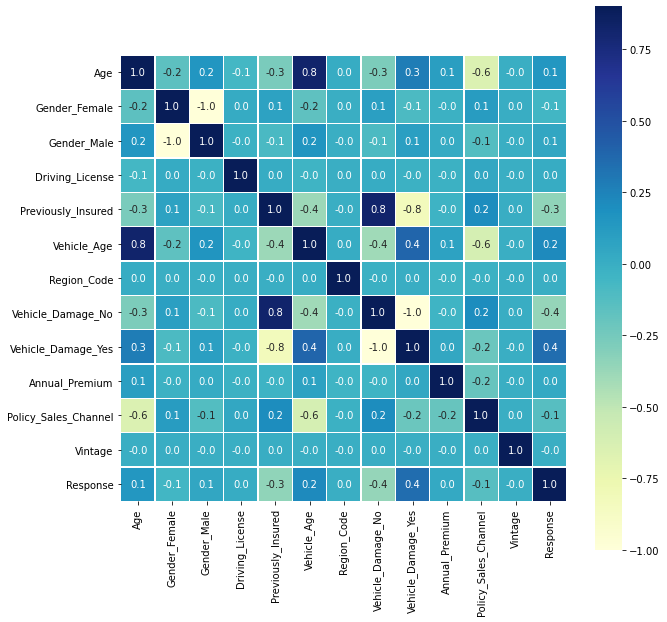

In [ ]:
SpearmanCorr = df_final.corr(method="spearman")
matplotlib.pyplot.figure(figsize=(10,10))
sns.heatmap(SpearmanCorr, vmax=.9, square=True, annot=True, linewidths=.3, cmap="YlGnBu", fmt='.1f')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
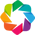

:Layout
   .Distribution.Age                  :Distribution   [Age]   (Density)
   .Distribution.Region_Code          :Distribution   [Region_Code]   (Density)
   .Distribution.Annual_Premium       :Distribution   [Annual_Premium]   (Density)
   .Distribution.Policy_Sales_Channel :Distribution   [Policy_Sales_Channel]   (Density)
   .Distribution.Vehicle_Age          :Distribution   [Vehicle_Age]   (Density)
   .Distribution.Vintage              :Distribution   [Vintage]   (Density)

In [ ]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
age = hv.Distribution(df['Age'],label="Age").opts(color="red")
reg = hv.Distribution(df['Region_Code'],label="Region_Code").opts(color="green")
prem = hv.Distribution(df['Annual_Premium'],label="Annual_Premium").opts(color="yellow")
chan = hv.Distribution(df['Policy_Sales_Channel'],label="Policy_Sales_Channel").opts(color="blue")
vehage = hv.Distribution(df['Vehicle_Age'],label="Vehicle_Age").opts(color="purple")
vin = hv.Distribution(df['Vintage'],label="Vintage").opts(color="pink")

(age + reg + prem + chan + vehage + vin).opts(opts.Distribution(xlabel="Values", ylabel="Density", width=400, height=300,tools=['hover'],show_grid=True)).cols(3)

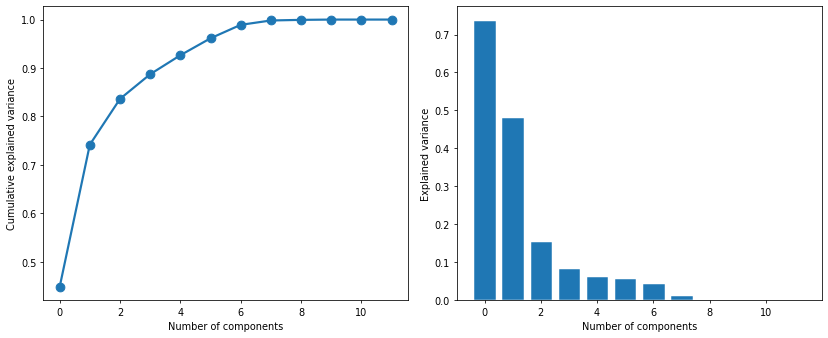

In [ ]:
pca = PCA().fit(df_final[VariablesNoTarget])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=70, facecolor='w', edgecolor='k')
ax0, ax1 = axes.flatten()

sns.set('talk', palette='colorblind')

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

ax0.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
ax0.set_xlabel('Number of components')
ax0.set_ylabel('Cumulative explained variance');

ax1.bar(range(df_final[VariablesNoTarget].shape[1]),pca.explained_variance_)
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Explained variance');

plt.tight_layout()
plt.show()


In [ ]:
n_PCA_95 = np.size(np.cumsum(pca.explained_variance_ratio_)>0.95) - np.count_nonzero(np.cumsum(pca.explained_variance_ratio_)>0.95)
print("Already: " + format(n_PCA_95) + " components cover 95% of variance.")

Already: 5 components cover 95% of variance.


######### I apply regular PCA with 5 components and check what variables contribute the most:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if __name__ == '__main__':
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


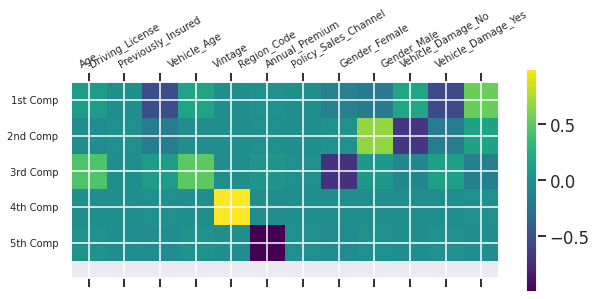

In [ ]:
pca = PCA(5).fit((df_final[VariablesNoTarget]))

X_pca=pca.transform((df_final[VariablesNoTarget])) 

plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],VariablesNoTarget,fontsize=10,rotation=30)
plt.tight_layout()
plt.show()

In [ ]:
# To break it down in even more readable way:

PCA_vars = [0]*len(VariablesNoTarget)

for i, feature in zip(range(len(VariablesNoTarget)),VariablesNoTarget):
    x = ExtractColumn(pca.components_,i)
    if ((max(x) > 0.4) | (min(x) < -0.4)):
        if abs(max(x)) > abs(min(x)):
            PCA_vars[i] = max(x)
        else:
            PCA_vars[i] = min(x)                 
    else:
        PCA_vars[i] = 0

PCA_vars = pd.DataFrame(list(zip(VariablesNoTarget,PCA_vars)),columns=('Name','Max absolute contribution'),index=range(1,13,1))      
PCA_vars = PCA_vars[(PCA_vars['Max absolute contribution']!=0)]
PCA_vars

Name  Max absolute contribution
1                    Age                   0.450700
3     Previously_Insured                  -0.514392
4            Vehicle_Age                   0.493746
5                Vintage                   0.999940
6            Region_Code                  -0.998170
8   Policy_Sales_Channel                  -0.704745
9          Gender_Female                   0.679599
10           Gender_Male                  -0.679599
11     Vehicle_Damage_No                  -0.553694
12    Vehicle_Damage_Yes                   0.553694

In [ ]:
shuffle_df = df_final.sample(frac=1)

# Define a size for your train set 
train_sizepca=int(0.80*df_final.shape[0])

# Split your dataset 
df_train = shuffle_df[:train_sizepca]
df_test= shuffle_df[train_sizepca:]


In [ ]:
df_final=df_final.sample(frac=1)
X2=df_final.iloc[:,[0,6,9,10,11]].values
y2=df_final.iloc[:,12].values
X2=X2.astype(float)
#feature scaling
fs2=FeatureScaling(X2,y2)
X2=fs2.fit_transform_X()

In [ ]:
#training set split in x-y dimension
X_trainpca=X2[0:train_sizepca,:]
y_trainpca=y2[0:train_sizepca]#testing set split 
X_testpca=X2[train_sizepca:,:] 
y_testpca=y2[train_sizepca:]

In [ ]:
#creating object for classifier
nb2=Naive_Bayes()
#fit the classifier
nb2.fit(X_trainpca,y_trainpca)

In [ ]:
#getting the confusion matrix
y_predpca=nb2.predict(X_testpca)
tp=len([i for i in range(0,y_testpca.shape[0]) if y_testpca[i]==0 and y_predpca[i]==0])
tn=len([i for i in range(0,y_testpca.shape[0]) if y_testpca[i]==0 and y_predpca[i]==1])
fp=len([i for i in range(0,y_testpca.shape[0]) if y_testpca[i]==1 and y_predpca[i]==0])
fn=len([i for i in range(0,y_testpca.shape[0]) if y_testpca[i]==1 and y_predpca[i]==1])
confusion_matrix=np.array([[tp,tn],[fp,fn]])
print(confusion_matrix)

accuracy = ((tn+tp)/(tn+fp+fn+tp) ) *100
print(accuracy)

[[66829   142]
 [ 9211    40]]
87.86308414893338


# PART 3 Using Z score


#Task a

We will use Z score to eliminate outliers if its value is greater than (mean + 3 x Standard deviation).

In [ ]:
def detect_outliers(data):
    outliers = []
    mean = np.mean(data)
    #print(mean)
    std =np.std(data)   
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(i)
    return outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


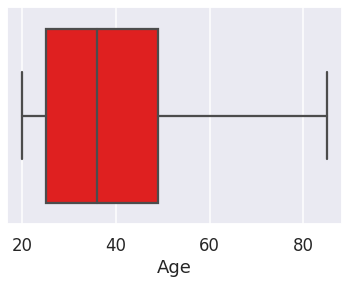

In [ ]:
sns.boxplot('Age', data=data, orient='v', color='red')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


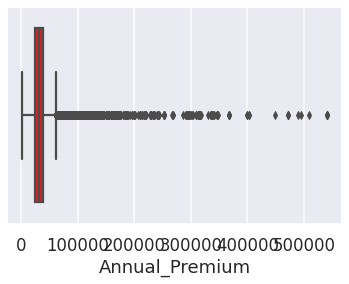

In [ ]:
sns.boxplot('Annual_Premium', data=data,orient='v', color='red')

Detecting outliers in annual_premium and age features of the dataset.

In [ ]:
#printing the number of outliers in the Annual_Premium
annual_o = detect_outliers(train['Annual_Premium'].tolist())
len(annual_o)


1664

In [ ]:
age_o = detect_outliers(train['Age'].tolist())
len(age_o)
#no outliers on age feature

0

In [ ]:
#dropping samples having maximum outliers in Annual_Premium
train_o = train
for x in annual_o:
  train_o = train_o[train_o.Annual_Premium != x]


#Task b)

Using the sequential backward selection method to remove features.

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
train['Gender'] = le.fit_transform(train['Gender'])
train['Previously_Insured'] = le.fit_transform(train['Previously_Insured'])
train['Vehicle_Age'] = le.fit_transform(train['Vehicle_Age'])
train['Vehicle_Damage'] = le.fit_transform(train['Vehicle_Damage'])
train['Response'] = le.fit_transform(train['Response'])
train['Annual_Premium'] = train['Annual_Premium'].astype(int) 
train['Policy_Sales_Channel'] = train['Policy_Sales_Channel'].astype(int) 
train['Region_Code'] = train['Region_Code'].astype(int) 

train = pd.concat([train[['Age','Region_Code','Annual_Premium', 'Policy_Sales_Channel', 'Vintage']],
           pd.get_dummies(train[['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']])], axis=1)

In [ ]:
le = preprocessing.LabelEncoder()
test['Gender'] =le.fit_transform(test['Gender'])
test['Previously_Insured'] = le.fit_transform(test['Previously_Insured'])
test['Vehicle_Age'] = le.fit_transform(test['Vehicle_Age'])
test['Vehicle_Damage'] = le.fit_transform(test['Vehicle_Damage'])
test['Response'] = le.fit_transform(test['Response'])
test['Annual_Premium'] = test['Annual_Premium'].astype(int) 
test['Policy_Sales_Channel'] = test['Policy_Sales_Channel'].astype(int) 
test['Region_Code'] = test['Region_Code'].astype(int)

test = pd.concat([test[['Age', 'Region_Code','Annual_Premium', 'Policy_Sales_Channel', 'Vintage']],
           pd.get_dummies(test[['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']])], axis=1)

In [ ]:
print("accuracy before running sequential backward selection")
print(accuracy)

accuracy before running sequential backward selection
87.86308414893338


In [ ]:
#to store list of features in list
col = train.columns.tolist()

In [ ]:
#variable to store maximum accuracy
max_accuracy =accuracy
#to store the list of features removed
feature_removed = ""

In [ ]:
#Sequential backward selection 
for feature in col:
  train.drop([feature], axis = 1)
  test.drop([feature], axis = 1)
  train_size=int(0.80*data.shape[0])
  test_size=int(0.20*data.shape[0])
  data.drop([feature],axis =1)
  data=data.sample(frac=1)
  X=data.iloc[:,[4, 8]].values
  y=data.iloc[:,11].values
  X=X.astype(float)
  #feature scaling
  fs=FeatureScaling(X,y)
  X=fs.fit_transform_X()

  #training set split in x-y dimension
  X_train=X[0:train_size,:]
  y_train=y[0:train_size]  #testing set split 
  X_test=X[train_size:,:] 
  y_test=y[train_size:]

  #creating object for classifier
  nb=Naive_Bayes()
  #fit the classifier
  nb.fit(X_train,y_train)

  #getting the confusion matrix
  y_pred=nb.predict(X_test)
  tp=len([i for i in range(0,y_test.shape[0]) if y_test[i]==0 and y_pred[i]==0])
  tn=len([i for i in range(0,y_test.shape[0]) if y_test[i]==0 and y_pred[i]==1])
  fp=len([i for i in range(0,y_test.shape[0]) if y_test[i]==1 and y_pred[i]==0])
  fn=len([i for i in range(0,y_test.shape[0]) if y_test[i]==1 and y_pred[i]==1])
  confusion_matrix=np.array([[tp,tn],[fp,fn]])
  #print(confusion_matrix)

  t_accuracy = ((tn+tp)/(tn+fp+fn+tp) ) *100
  
  print(t_accuracy)
  if(t_accuracy>max_accuracy):
    max_accuracy = t_accuracy
    feature_removed = feature
print(feature_removed)    


87.86964393482197
87.75156778882737
87.68203405840833
87.56002204088058
87.74107213140563
87.72664060245073
88.01789509590408
87.75681561753824
87.6269318569442
87.64005142872136
Previously_Insured


In [ ]:
#dropping the feauture
new_train = train.drop([feature_removed], axis = 1)

In [ ]:
#Printing the list of columns after sequential backward selection
print(new_train.columns.tolist())

['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Response']


# Task 4 -
Printing the final result

In [ ]:
#Final Accuracy After all tasks
print(max_accuracy)
#Confusion Matrix 
print(confusion_matrix)

88.01789509590408
[[66711    90]
 [ 9399    22]]
